In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data =pd.read_csv('Train.txt')
pd.set_option('display.max_columns',None)

In [3]:
column = ["duration","protocol_type","service","flag","src_bytes","dst_bytes",
          "land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in",
          "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
          "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login",
          "count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate",
          "same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", 
          "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", 
          "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [4]:
row = list(data.columns)
row = pd.DataFrame(row).transpose()
row.columns = column
data.columns = column
data = data.append(row , ignore_index=True)


In [5]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0.08,0.15,0,255,1,0,0.6,0.88,0,0,0,0,0,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1,1,0,0,0.05,0.07,0,255,26,0.1,0.05,0,0,1,1,0,0,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0,0,1,0,0,30,255,1,0,0.03,0.04,0.03,0.01,0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0,0,0,0,1,0,0.09,255,255,1,0,0,0,0,0,0,0,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0,0,1,1,0.16,0.06,0,255,19,0.07,0.07,0,0,0,0,1,1,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,255,244,0.96,0.01,0.01,0,0,0,0,0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,255,30,0.12,0.06,0,0,0.72,0,0.01,0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1,1,0,0,0.06,0.05,0,255,8,0.03,0.05,0,0,1,1,0,0,neptune,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,255,77,0.3,0.03,0.3,0,0,0,0,0,normal,21


In [6]:
data.groupby(by = 'attack')['attack'].count()

attack
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
Name: attack, dtype: int64

In [7]:
data ['attack'] = np.where(data['attack'] == 'normal' , 0 ,1 )

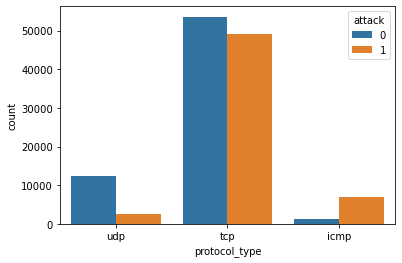

In [8]:
sns.countplot(x= 'protocol_type'  ,hue = 'attack', data= data)

In [9]:
data.groupby(by = 'protocol_type')['attack'].value_counts()

protocol_type  attack
icmp           1          6982
               0          1309
tcp            0         53600
               1         49089
udp            0         12434
               1          2559
Name: attack, dtype: int64

In [10]:
def dummie_data(data ,feature):
    protocol = pd.get_dummies(data[feature] , prefix=feature,  drop_first=True)
    data = pd.concat([data , protocol] , axis = 1)
    data.drop(feature, axis=1 , inplace = True )
    return(data)

In [11]:
data = dummie_data(data,'protocol_type')

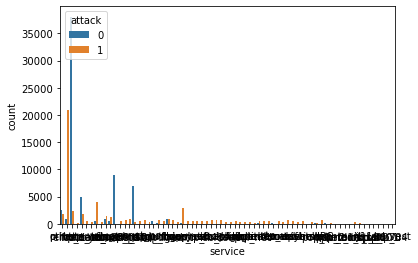

In [12]:
sns.countplot(x= 'service'  ,hue = 'attack', data= data)

In [13]:
data.groupby(by = 'service')['attack'].value_counts().sort_values()

service    attack
http_2784  1             1
IRC        1             1
harvest    1             2
http_8001  1             2
aol        1             2
                     ...  
ftp_data   0          4984
smtp       0          7029
domain_u   0          9034
private    1         20871
http       0         38049
Name: attack, Length: 92, dtype: int64

In [14]:
data['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
aol              2
harvest          2
http_8001        2
http_2784        1
Name: service, Length: 70, dtype: int64

In [15]:
def target_based_imputation(data , feature):
    len(data[feature].unique())

    a  = data[feature].value_counts()

    c = data[data['attack']==1][feature].value_counts()

    d = c/a

    dic = dict(d)

    data[feature] = data[feature].map(dic)
    
    return(data)

In [16]:
data = target_based_imputation(data,'service')
data = target_based_imputation(data,'flag')


In [17]:
data

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,protocol_type_tcp,protocol_type_udp
0,0,0.402615,0.154140,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0.08,0.15,0,255,1,0,0.6,0.88,0,0,0,0,0,0,15,0,1
1,0,0.955063,0.989842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1,1,0,0,0.05,0.07,0,255,26,0.1,0.05,0,0,1,1,0,0,1,19,1,0
2,0,0.056746,0.154140,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0,0,1,0,0,30,255,1,0,0.03,0.04,0.03,0.01,0,0.01,0,21,1,0
3,0,0.056746,0.154140,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0,0,0,0,1,0,0.09,255,255,1,0,0,0,0,0,0,0,0,21,1,0
4,0,0.955063,0.760260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0,0,1,1,0.16,0.06,0,255,19,0.07,0.07,0,0,0,0,1,1,1,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,8,0.955063,0.154140,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,255,244,0.96,0.01,0.01,0,0,0,0,0,0,21,0,1
125969,0,0.038835,0.154140,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,255,30,0.12,0.06,0,0,0.72,0,0.01,0,0,18,1,0
125970,0,1.000000,0.989842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1,1,0,0,0.06,0.05,0,255,8,0.03,0.05,0,0,1,1,0,0,1,20,1,0
125971,0,0.273469,0.154140,151,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,255,77,0.3,0.03,0.3,0,0,0,0,0,0,21,1,0


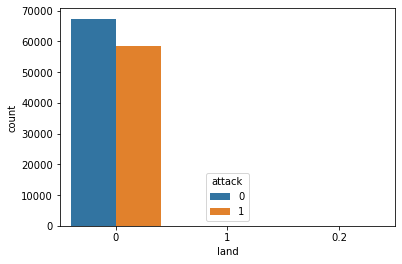

attack
land attack        
0    0        67335
     1        58612
1    1           18
     0            7
0.2  0            1

In [18]:
sns.countplot(x= 'land'  ,hue = 'attack', data= data)
plt.show()
data.groupby(by = 'land').agg({'attack':'value_counts'})

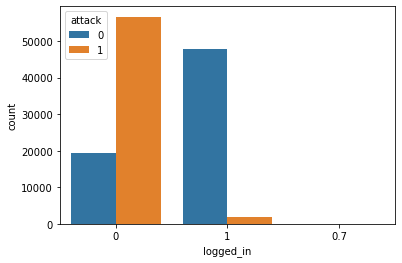

attack
logged_in attack        
0         1        56635
          0        19485
1         0        47857
          1         1995
0.7       0            1

In [19]:
sns.countplot(x= 'logged_in'  ,hue = 'attack', data= data)
plt.show()
data.groupby(by = 'logged_in').agg({'attack':'value_counts'})

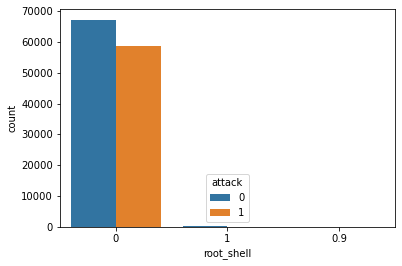

attack
root_shell attack        
0          0        67205
           1        58598
1          0          137
           1           32
0.9        0            1

In [20]:
sns.countplot(x= 'root_shell'  ,hue = 'attack', data= data)
plt.show()
data.groupby(by = 'root_shell').agg({'attack':'value_counts'})

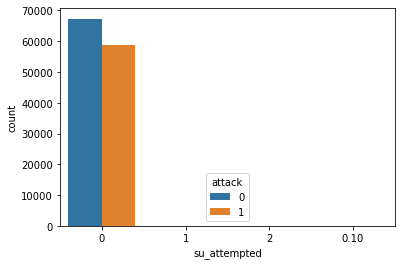

attack
su_attempted attack        
0            0        67263
             1        58629
1            0           20
             1            1
2            0           59
0.10         0            1

In [21]:
sns.countplot(x= 'su_attempted'  ,hue = 'attack', data= data)
plt.show()
data.groupby(by = 'su_attempted').agg({'attack':'value_counts'})

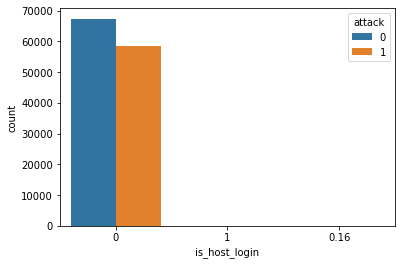

attack
is_host_login attack        
0             0        67341
              1        58630
1             0            1
0.16          0            1

In [22]:
sns.countplot(x= 'is_host_login'  ,hue = 'attack', data= data)
plt.show()
data.groupby(by = 'is_host_login').agg({'attack':'value_counts'})

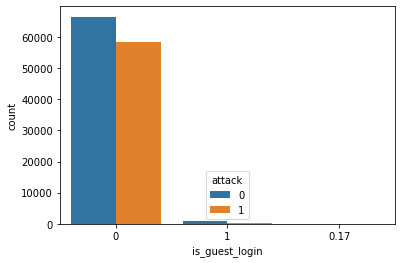

attack
is_guest_login attack        
0              0        66469
               1        58316
1              0          873
               1          314
0.17           0            1

In [23]:
sns.countplot(x= 'is_guest_login'  ,hue = 'attack', data= data)
plt.show()
data.groupby(by = 'is_guest_login').agg({'attack':'value_counts'})

In [24]:
data['duration'] = data['duration'].astype('float')
data.head()


,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,protocol_type_tcp,protocol_type_udp
0,0.0,0.402615,0.154140,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0.08,0.15,0,255,1,0,0.6,0.88,0,0,0,0,0,0,15,0,1
1,0.0,0.955063,0.989842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1,1,0,0,0.05,0.07,0,255,26,0.1,0.05,0,0,1,1,0,0,1,19,1,0
2,0.0,0.056746,0.154140,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0,0,1,0,0,30,255,1,0,0.03,0.04,0.03,0.01,0,0.01,0,21,1,0
3,0.0,0.056746,0.154140,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0,0,0,0,1,0,0.09,255,255,1,0,0,0,0,0,0,0,0,21,1,0
4,0.0,0.955063,0.760260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0,0,1,1,0.16,0.06,0,255,19,0.07,0.07,0,0,0,0,1,1,1,21,1,0


In [25]:
data.groupby(by = 'attack')['duration'].agg('mean')

attack
0    168.587396
1    423.320689
Name: duration, dtype: float64

In [26]:
data = data.fillna(0)

In [27]:
data.isnull().sum()

duration                       0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [28]:
column = data.columns[(data.dtypes=='object')]

In [29]:
def obj_to_float(data , feature):
    data[feature]  = data[feature].apply(lambda x : str(x).split('.')[0])
    data[feature] = data[feature].astype('float')
    return (data)
    

In [30]:
for feature in column:
    data = obj_to_float(data,feature)

In [31]:
data

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,protocol_type_tcp,protocol_type_udp
0,0.0,0.402615,0.154140,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15.0,0,1
1,0.0,0.955063,0.989842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,255.0,26.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,19.0,1,0
2,0.0,0.056746,0.154140,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,255.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,1,0
3,0.0,0.056746,0.154140,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,32.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,255.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,1,0
4,0.0,0.955063,0.760260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,19.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,255.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,21.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,8.0,0.955063,0.154140,105.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,0,1
125969,0.0,0.038835,0.154140,2231.0,384.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18.0,1,0
125970,0.0,1.000000,0.989842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,255.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,20.0,1,0
125971,0.0,0.273469,0.154140,151.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,1,0


In [61]:
from sklearn.model_selection import train_test_split


feature_train , feature_test ,label_train , label_test = train_test_split(data.drop(columns='attack') , 
                                                                           data['attack'] ,
                                                                           test_size = 0.3,
                                                                           random_state = 21)

In [62]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score

In [63]:
m = RandomForestClassifier()

In [64]:
model = m.fit(feature_train,label_train)
y_predict = model.predict(feature_train)

In [65]:
print(confusion_matrix(label_train , y_predict))

print(recall_score(label_train , y_predict))

print(precision_score(label_train , y_predict))

[[47057     0]
 [    0 41124]]
1.0
1.0


In [66]:
y_predict = model.predict(feature_test)

In [67]:
print(confusion_matrix(label_test , y_predict))

print(recall_score(label_test , y_predict))

print(precision_score(label_test , y_predict))

[[20275    11]
 [   12 17494]]
0.9993145207357478
0.999371608111968


In [68]:
m.n_estimators

100

In [69]:
m.n_features_

43